## Remove duplicates

In [1]:
import os
from PIL import Image
import numpy as np

def find_dups(name):
    existing = []
    existing_path = []
    dup = []
    for i in os.listdir('../data/in/' + name):
        img = Image.open('../data/in/' + name + '/' + i).convert('RGB')
        img = img.convert('L')  
        hist = list(np.array(img.histogram()))

        found = -1
        for idx, j in enumerate(existing):
            if hist == j:
                found = idx

        if found != -1:
            dup.append([
                '../data/in/' + name + '/' + i,
                existing_path[idx]
            ])
        else:
            existing.append(hist)
            existing_path.append('../data/in/' + name + '/' + i)
            
    print(f"Found {len(dup)} possible duplicates in {name}")
    
    return dup

In [6]:
dups = find_dups("pineapple")

Found 0 possible duplicates in pineapple


In [7]:
dups

[]

## Dataset report

In [8]:
import seaborn as sns
import os

In [9]:
freq = {}
for i in os.listdir('../data/in/'):
    freq[i] = len(os.listdir('../data/in/' + i))

In [10]:
sum(freq.values())

2205

<Axes: xlabel='counts', ylabel='names'>

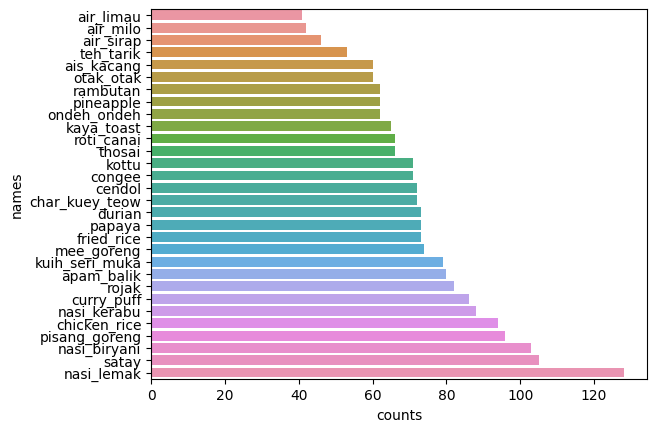

In [11]:
import pandas as pd

df = pd.DataFrame({
    "names": list(freq.keys()),
    "counts":list(freq.values())
})

df = df.sort_values(by=['counts'])

sns.barplot(y=df.names, x=df.counts)

## Process food-101 outliers dataset

In [ ]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

with h5py.File('../data/out/food_c101_n1000_r384x384x3.h5', 'r') as f:    
    cat = f['category'][:]
    cat_names = f['category_names'][:]
    images = f['images'][:]

    cnt = {}
    for i in range(1000):
        food_cat = cat_names[np.where(cat[i] == True)[0]][0].decode('utf-8')
        img = Image.fromarray(images[i])
        if food_cat not in cnt:
            cnt[food_cat] = 0
        cnt[food_cat] += 1
        img.save(f'../data/out/{food_cat}_{cnt[food_cat]}.png')

In [53]:
print([i.decode('utf-8') for i in cat_names])

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

## Process MSCOCO outliers dataset

In [57]:
import random
from PIL import Image

for i in random.sample(os.listdir('../data/val'), 1500):
    img = Image.open('../data/val/'+i)
    img.save(f'../data/val1/{i}')

## Generate datasets split

In [1]:
import os
import random
random.seed(42)

train_food = []
train_outliers = []
test_food = []
test_outliers = []

In [2]:
for i in os.listdir('../data/in/'):
    imgs = os.listdir('../data/in/' + i)
    split = int(0.8 * len(imgs))
    train_food +=  [{"path": f'in/{i}/{j}', "class": i} for j in imgs[:split]]
    test_food += [{"path": f'in/{i}/{j}', "class": i} for j in imgs[split:]]

In [3]:
random.shuffle(train_food)
train_food[:5]

[{'path': 'in/nasi_kerabu/nasikerabu7.jpeg', 'class': 'nasi_kerabu'},
 {'path': 'in/air_milo/miloaismamakORmilopanasmamak75.jpeg',
  'class': 'air_milo'},
 {'path': 'in/roti_canai/roticanai137.png', 'class': 'roti_canai'},
 {'path': 'in/teh_tarik/tehtarikmamak46.jpeg', 'class': 'teh_tarik'},
 {'path': 'in/pisang_goreng/pisanggoreng38.jpeg', 'class': 'pisang_goreng'}]

In [4]:
random.shuffle(test_food)
test_food[:5]

[{'path': 'in/roti_canai/roticanai67.jpeg', 'class': 'roti_canai'},
 {'path': 'in/pisang_goreng/pisanggoreng90.jpeg', 'class': 'pisang_goreng'},
 {'path': 'in/ais_kacang/aiskacang93.jpeg', 'class': 'ais_kacang'},
 {'path': 'in/nasi_biryani/nasibiryani80.jpeg', 'class': 'nasi_biryani'},
 {'path': 'in/chicken_rice/images.jpeg', 'class': 'chicken_rice'}]

In [5]:
for i in os.listdir('../data/out/'):
    imgs = os.listdir('../data/out/' + i)
    split = int(0.8 * len(imgs))
    train_outliers +=  [{"path": f'out/{i}/{j}'} for j in imgs[:split]]
    test_outliers += [{"path": f'out/{i}/{j}'} for j in imgs[split:]]

In [6]:
random.shuffle(train_outliers)
train_outliers[:5]

[{'path': 'out/foods/baklava_9.png'},
 {'path': 'out/screens/screens_214.jpg'},
 {'path': 'out/mscoco/000000171050.jpg'},
 {'path': 'out/screens/screens_224.jpg'},
 {'path': 'out/screens/screens_287.jpg'}]

In [7]:
random.shuffle(test_outliers)
test_outliers[:5]

[{'path': 'out/mscoco/000000554328.jpg'},
 {'path': 'out/foods/sashimi_19.png'},
 {'path': 'out/mscoco/000000481386.jpg'},
 {'path': 'out/mscoco/000000479912.jpg'},
 {'path': 'out/mscoco/000000568690.jpg'}]

In [8]:
import json

with open('../data/train_food.json', 'w') as f:
    json.dump(train_food, f)

In [9]:
with open('../data/test_food.json', 'w') as f:
    json.dump(test_food, f)

In [10]:
with open('../data/train_outliers.json', 'w') as f:
    json.dump(train_outliers, f)

In [11]:
with open('../data/test_outliers.json', 'w') as f:
    json.dump(test_outliers, f)

## Generate labels

In [111]:
import os
import random

In [112]:
labels = os.listdir('../data/in/')

In [113]:
labels

['air_limau',
 'air_milo',
 'air_sirap',
 'ais_kacang',
 'apam_balik',
 'cendol',
 'char_kuey_teow',
 'chicken_rice',
 'congee',
 'curry_puff',
 'durian',
 'fried_rice',
 'kaya_toast',
 'kottu',
 'kuih_seri_muka',
 'mee_goreng',
 'nasi_biryani',
 'nasi_kerabu',
 'nasi_lemak',
 'ondeh_ondeh',
 'otak_otak',
 'papaya',
 'pineapple',
 'pisang_goreng',
 'rambutan',
 'rojak',
 'roti_canai',
 'satay',
 'teh_tarik',
 'thosai']

In [114]:
import json

with open('../data/labels.json', 'w') as f:
    json.dump(labels, f)